# **Project 5 - Movie Recommendation System**

In [4]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns

# Getting the dataset from the csv file
df = pd.read_csv('movies_metadata.csv', low_memory=False)
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


## **Understanding the dataset**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [10]:
df.shape

(45466, 24)

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
revenue,45460.0,1.120935e+07,6.433225e+07,0.0,0.0,0.0,0.0,2.787965e+09
runtime,45203.0,9.412820e+01,3.840781e+01,0.0,85.0,95.0,107.0,1.256000e+03
vote_average,45460.0,5.618207e+00,1.924216e+00,0.0,5.0,6.0,6.8,1.000000e+01
vote_count,45460.0,1.098973e+02,4.913104e+02,0.0,3.0,10.0,34.0,1.407500e+04


In [29]:
df.isna().sum().to_frame(name='null count').T

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
null count,0,40972,0,0,37684,0,17,11,0,954,5,386,3,3,87,6,263,6,87,25054,6,6,6,6


## **Univariate Analysis**

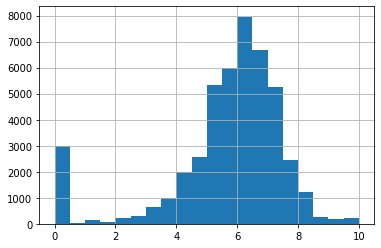

In [23]:
df["vote_average"].hist(bins=20);

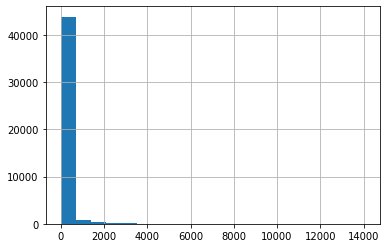

In [24]:
df["vote_count"].hist(bins=20);

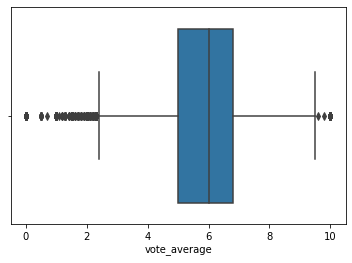

In [28]:
sns.boxplot(x="vote_average", data=df);

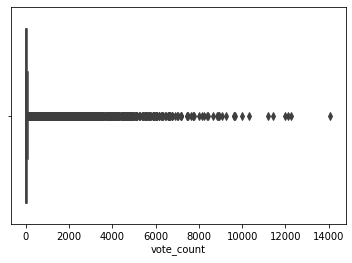

In [30]:
sns.boxplot(x="vote_count", data=df);

## **Building Recommender System**

In [60]:
c=df['vote_average'].mean()
c

5.618207215133889

In [61]:
m=df['vote_count'].quantile(0.9)
m

160.0

In [62]:
# Creating a sub-dataset with list of movies having longer runtime, large revenue and movie having a homepage to showcase.
qm=df[(df['runtime']>150)&(df['revenue']>300000000)&(df['homepage'].notna())]

In [63]:
qm.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
522,False,NaN,22000000,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",http://www.schindlerslist.com/,424,tt0108052,en,Schindler's List,The true story of how businessman Oskar Schind...,41.725123,/yPisjyLweCl1tbgwgtzBCNCBle.jpg,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'US', 'name': 'United States o...",1993-11-29,3.213656e+08,195.0,"[{'iso_639_1': 'de', 'name': 'Deutsch'}, {'iso...",Released,"Whoever saves one life, saves the world entire.",Schindler's List,False,8.3,4436.0
1639,False,NaN,200000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.titanicmovie.com,597,tt0120338,en,Titanic,"84 years later, a 101-year-old woman named Ros...",26.88907,/kHXEpyfl6zqn8a6YuozZUujufXf.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1997-11-18,1.845034e+09,194.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Nothing on Earth could come between them.,Titanic,False,7.5,7770.0
4766,False,"{'id': 1241, 'name': 'Harry Potter Collection'...",125000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://harrypotter.warnerbros.com/harrypottera...,671,tt0241527,en,Harry Potter and the Philosopher's Stone,Harry Potter has lived under the stairs at his...,38.187238,/dCtFvscYcXQKTNvyyaQr2g2UacJ.jpg,"[{'name': '1492 Pictures', 'id': 436}, {'name'...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2001-11-16,9.764756e+08,152.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Let the Magic Begin.,Harry Potter and the Philosopher's Stone,False,7.5,7188.0
4863,False,"{'id': 119, 'name': 'The Lord of the Rings Col...",93000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://www.lordoftherings.net/,120,tt0120737,en,The Lord of the Rings: The Fellowship of the Ring,"Young hobbit Frodo Baggins, after inheriting a...",32.070725,/bxVxZb5O9OxCO0oRUNdCnpy9NST.jpg,"[{'name': 'WingNut Films', 'id': 11}, {'name':...","[{'iso_3166_1': 'NZ', 'name': 'New Zealand'}, ...",2001-12-18,8.713684e+08,178.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,One ring to rule them all,The Lord of the Rings: The Fellowship of the Ring,False,8.0,8892.0
5814,False,"{'id': 119, 'name': 'The Lord of the Rings Col...",79000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://www.lordoftherings.net/,121,tt0167261,en,The Lord of the Rings: The Two Towers,Frodo and Sam are trekking to Mordor to destro...,29.423537,/wf3v0Pn09jnT5HSaYal7Ami3bdA.jpg,"[{'name': 'WingNut Films', 'id': 11}, {'name':...","[{'iso_3166_1': 'NZ', 'name': 'New Zealand'}, ...",2002-12-18,9.262874e+08,179.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A New Power Is Rising.,The Lord of the Rings: The Two Towers,False,8.0,7641.0


In [69]:
qm.shape

(27, 24)

In [70]:
### Now among the seleted set we are going to get movies with higher vote_count (votes from different users) and proide them as the recommeded ones.

selctd = qm[qm['vote_count']>=m]

In [71]:
selctd.shape

(27, 24)

In [72]:
# Function for selection of top movies for recommendation from the previously selected dataset
# c is the mean, calculated earlier
# m is the 90% quantile value of vote_count calculated earlier

def wr(x, m=m, c=c):
  v=x['vote_count']
  r=x['vote_average']
  return (v/(v+m)*r)+(m/(m+v)*c) # formula for IMDB rating

In [73]:
# applying the function for recommendation score

selctd['score']=selctd.apply(wr,axis=1)

In [74]:
selctd.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,score
522,False,NaN,22000000,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",http://www.schindlerslist.com/,424,tt0108052,en,Schindler's List,The true story of how businessman Oskar Schind...,41.725123,/yPisjyLweCl1tbgwgtzBCNCBle.jpg,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'US', 'name': 'United States o...",1993-11-29,3.213656e+08,195.0,"[{'iso_639_1': 'de', 'name': 'Deutsch'}, {'iso...",Released,"Whoever saves one life, saves the world entire.",Schindler's List,False,8.3,4436.0,8.206639
1639,False,NaN,200000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.titanicmovie.com,597,tt0120338,en,Titanic,"84 years later, a 101-year-old woman named Ros...",26.88907,/kHXEpyfl6zqn8a6YuozZUujufXf.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1997-11-18,1.845034e+09,194.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Nothing on Earth could come between them.,Titanic,False,7.5,7770.0,7.462032
4766,False,"{'id': 1241, 'name': 'Harry Potter Collection'...",125000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://harrypotter.warnerbros.com/harrypottera...,671,tt0241527,en,Harry Potter and the Philosopher's Stone,Harry Potter has lived under the stairs at his...,38.187238,/dCtFvscYcXQKTNvyyaQr2g2UacJ.jpg,"[{'name': '1492 Pictures', 'id': 436}, {'name'...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2001-11-16,9.764756e+08,152.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Let the Magic Begin.,Harry Potter and the Philosopher's Stone,False,7.5,7188.0,7.459025
4863,False,"{'id': 119, 'name': 'The Lord of the Rings Col...",93000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://www.lordoftherings.net/,120,tt0120737,en,The Lord of the Rings: The Fellowship of the Ring,"Young hobbit Frodo Baggins, after inheriting a...",32.070725,/bxVxZb5O9OxCO0oRUNdCnpy9NST.jpg,"[{'name': 'WingNut Films', 'id': 11}, {'name':...","[{'iso_3166_1': 'NZ', 'name': 'New Zealand'}, ...",2001-12-18,8.713684e+08,178.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,One ring to rule them all,The Lord of the Rings: The Fellowship of the Ring,False,8.0,8892.0,7.957900
5814,False,"{'id': 119, 'name': 'The Lord of the Rings Col...",79000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://www.lordoftherings.net/,121,tt0167261,en,The Lord of the Rings: The Two Towers,Frodo and Sam are trekking to Mordor to destro...,29.423537,/wf3v0Pn09jnT5HSaYal7Ami3bdA.jpg,"[{'name': 'WingNut Films', 'id': 11}, {'name':...","[{'iso_3166_1': 'NZ', 'name': 'New Zealand'}, ...",2002-12-18,9.262874e+08,179.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A New Power Is Rising.,The Lord of the Rings: The Two Towers,False,8.0,7641.0,7.951149


In [77]:
selctd = selctd.sort_values('score',ascending=False)

selctd[['title','vote_count','vote_average','score']].head(10)

,title,vote_count,vote_average,score
12481,The Dark Knight,12269.0,8.3,8.265477
522,Schindler's List,4436.0,8.3,8.206639
22879,Interstellar,11187.0,8.1,8.065005
7000,The Lord of the Rings: The Return of the King,8226.0,8.1,8.052649
4863,The Lord of the Rings: The Fellowship of the Ring,8892.0,8.0,7.957900
5814,The Lord of the Rings: The Two Towers,7641.0,8.0,7.951149
22131,The Wolf of Wall Street,6768.0,7.9,7.847303
13605,Inglourious Basterds,6598.0,7.9,7.845977
20051,Django Unchained,10297.0,7.8,7.766617
18252,The Dark Knight Rises,9263.0,7.6,7.566350


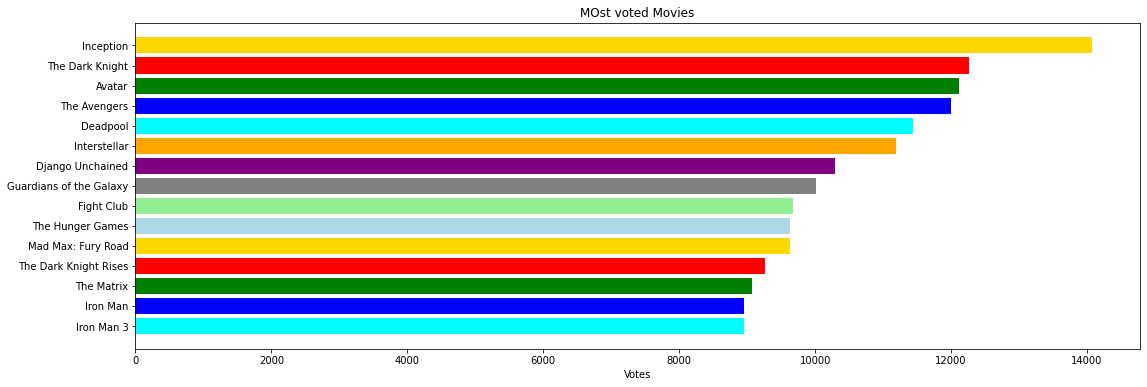

In [90]:
d=df.sort_values('vote_count',ascending=False)
plt.figure(figsize=(18,6))

plt.barh(d['title'].head(15),d['vote_count'].head(15),align='center',color=['gold', 'red', 'green', 'blue', 'cyan', 'orange', 'purple', 'grey', 'lightgreen', 'lightblue'])
plt.gca().invert_yaxis()
plt.xlabel("Votes")
plt.title("MOst voted Movies");